In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import csv

In [62]:
import pandas as pd
import numpy as np
verlander_train = pd.read_csv('Data/train_sets/verlander_train.csv',index_col=0).values
scherzer_train = pd.read_csv('Data/train_sets/scherzer_train.csv',index_col=0).values
lester_train =  pd.read_csv('Data/train_sets/lester_train.csv',index_col=0).values
hamels_train =  pd.read_csv('Data/train_sets/hamels_train.csv',index_col=0).values
verlander_test = pd.read_csv('Data/test_sets/verlander_test.csv',index_col=0).values
scherzer_test = pd.read_csv('Data/test_sets/scherzer_test.csv',index_col=0).values
lester_test =  pd.read_csv('Data/test_sets/lester_test.csv',index_col=0).values
hamels_test =  pd.read_csv('Data/test_sets/hamels_test.csv',index_col=0).values

In [63]:
scherzer_train_X = scherzer_train[:,5:]
scherzer_train_Y = scherzer_train[:,0:5]
scherzer_test_X = scherzer_test[:,5:]
scherzer_test_Y = scherzer_test[:,0:5]
lester_train_X = lester_train[:,5:]
lester_train_Y = lester_train[:,0:5]
lester_test_X = lester_test[:,5:]
lester_test_Y = lester_test[:,0:5]
hamels_train_X = hamels_train[:,5:]
hamels_train_Y = hamels_train[:,0:5]
hamels_test_X = hamels_test[:,5:]
hamels_test_Y = hamels_test[:,0:5]

In [64]:
verlander_train_X = verlander_train[:,4:]
verlander_train_Y = verlander_train[:,0:4]
verlander_test_X = verlander_test[:,4:]
verlander_test_Y = verlander_test[:,0:4]

In [65]:
verlander = (verlander_train_X,verlander_train_Y,verlander_test_X,verlander_test_Y)
lester = (lester_train_X,lester_train_Y,lester_test_X,lester_test_Y)
hamels = (hamels_train_X,hamels_train_Y,hamels_test_X,hamels_test_Y)
scherzer = (scherzer_train_X,scherzer_train_Y,scherzer_test_X,scherzer_test_Y)
pitchers = [verlander,lester,hamels,scherzer]
pitcher_score_lists = []
pitcher_scores = []
for pitcher in pitchers:
    train_X,train_Y,test_X,test_Y = pitcher
    k_range = range(1,26)
    scores = {}
    scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_X,train_Y)
        pred = knn.predict(test_X)
        scores[k] = metrics.accuracy_score(test_Y,pred)
        scores_list.append(metrics.accuracy_score(test_Y,pred))
    pitcher_scores.append(scores)
    pitcher_score_lists.append(scores_list)

In [66]:
train_X,train_Y,test_X,test_Y = scherzer
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_X,train_Y)
pred = knn.predict(test_X)
print(metrics.accuracy_score(test_Y,pred))

0.3869397501836885


Text(0, 0.5, 'Test Accuracy')

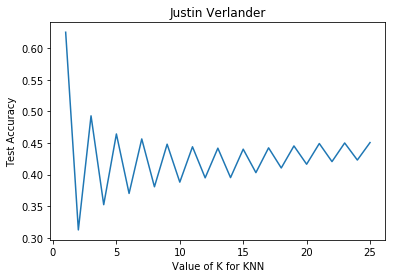

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,pitcher_score_lists[0])
plt.title('Justin Verlander')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

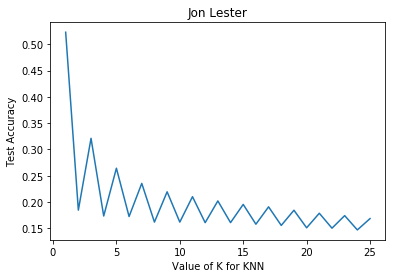

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,pitcher_score_lists[1])
plt.title('Jon Lester')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

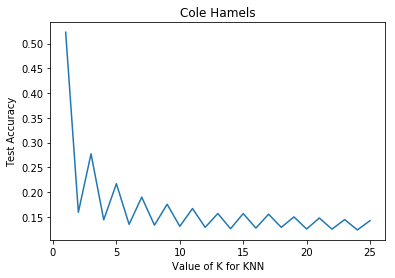

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,pitcher_score_lists[2])
plt.title('Cole Hamels')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

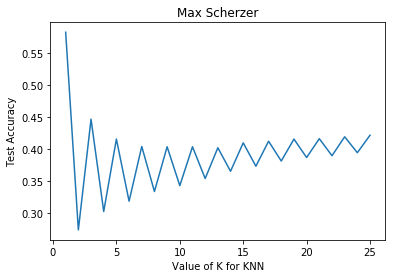

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,pitcher_score_lists[3])
plt.title('Max Scherzer')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')